# Dates & Calenders

In [1]:
two_hurricanes = ['10/7/2016', '6/21/2017']

In [2]:
from datetime import date

In [3]:
from collections import Counter

In [4]:
import pandas as pd
import numpy as np

In [5]:
two_hurricanes_dates = [date(2016,10,7), date(2017,6,21)]

In [6]:
print(f"Year: {two_hurricanes_dates[0].year}, {two_hurricanes_dates[1].year}")
print(f"Month: {two_hurricanes_dates[0].month}, {two_hurricanes_dates[1].month}")
print(f"day: {two_hurricanes_dates[0].day}, {two_hurricanes_dates[1].day}")

Year: 2016, 2017
Month: 10, 6
day: 7, 21


In [7]:
booboo_bd = date(2008,5,14)
print(f"booboo birthday: {booboo_bd.weekday()}")

booboo birthday: 2


Weekdays in Python: 0: Monday,...,6:Sunday

In [8]:
with open("florida.txt", 'r') as f:
    lines = f.readlines()

florida = []
for line in lines:
    line = line.split(',')
    line = [int(elem.strip()) for elem in line]
    temp_dt = date(line[0], line[1], line[2] )
    florida.append(temp_dt)

In [9]:
florida[:5]

[datetime.date(1950, 8, 31),
 datetime.date(1950, 9, 5),
 datetime.date(1950, 10, 18),
 datetime.date(1950, 10, 21),
 datetime.date(1951, 5, 18)]

In [10]:
# how many hurricanes before june month
early_hurricanes = 0
for hc in florida:
    if hc.month < 6:
        early_hurricanes += 1
print(f"Hurricanes befor June: {early_hurricanes}")

Hurricanes befor June: 10


In [11]:
# month wise hurricanes
cnt = Counter()
for m in [dt.month for dt in florida]:
    cnt[m] += 1
cnt

Counter({8: 49, 9: 70, 10: 43, 5: 8, 2: 1, 6: 32, 7: 21, 11: 9, 4: 1, 12: 1})

In [12]:
hc_mth_count = pd.DataFrame.from_dict(cnt, orient='index').reset_index()
hc_mth_count.columns = ['month', 'count']
hc_mth_count = hc_mth_count.sort_values('month')
hc_mth_count

month  count
4      2      1
8      4      1
3      5      8
5      6     32
6      7     21
0      8     49
1      9     70
2     10     43
7     11      9
9     12      1

## Math with dates

In [13]:
inoo_bd = date(2013, 1, 2)

In [14]:
# difference between booboo and inoo birthday
bd_delta =  inoo_bd - booboo_bd
print(bd_delta.days)

1694


In [15]:
print(booboo_bd)

2008-05-14


In [16]:
print(booboo_bd.isoformat())

2008-05-14


In [17]:
booboo_bd.strftime("%Y")

'2008'

In [18]:
booboo_bd.strftime("%Y/%m/%d")

'2008/05/14'

In [19]:
today = date.today()
today

datetime.date(2020, 6, 15)

In [20]:
today.strftime("%j")

'167'

In [21]:
from dateutil.relativedelta import relativedelta

In [22]:
# diff between inoo and booboo birthday
relativedelta(inoo_bd, booboo_bd)

relativedelta(years=+4, months=+7, days=+19)

In [23]:
my_bd = date(1971, 7, 5)
today = date.today()
relativedelta(today, my_bd)

relativedelta(years=+48, months=+11, days=+10)

# Dates and Times

In [24]:
from datetime import datetime

In [25]:
today = datetime.today()
today

datetime.datetime(2020, 6, 15, 18, 36, 7, 79983)

In [26]:
dt = datetime(2017, 12, 31, 15, 19, 13)
dt.isoformat()

'2017-12-31T15:19:13'

## Printing and parsing datetimes

In [27]:
dt = datetime(2017, 12, 30, 15, 19, 13)
print(dt.strftime("%Y-%m-%d"))

2017-12-30


In [28]:
print(dt.strftime("%H:%M:%S"))

15:19:13


In [29]:
# iso format
dt.isoformat()

'2017-12-30T15:19:13'

In [30]:
dt = datetime.strptime("12/30/2017 15:19:13", "%m/%d/%Y %H:%M:%S")
dt

datetime.datetime(2017, 12, 30, 15, 19, 13)

In [31]:
# unix timestamp; seconds passed since January 1, 1970

## Working with durations

In [32]:
d1 = datetime(2017, 10, 8, 23, 46, 47)
d2 = datetime(2017, 10, 9, 0, 10, 57)
print(d2 - d1)

0:24:10


In [33]:
duration = d2 - d1
duration.total_seconds()

1450.0

In [34]:
from datetime import timedelta

In [35]:
delta1 = timedelta(seconds=1)
d1 + delta1

datetime.datetime(2017, 10, 8, 23, 46, 48)

In [36]:
delta2 = timedelta(minutes=10, seconds=20)
d1 + delta2

datetime.datetime(2017, 10, 8, 23, 57, 7)

In [37]:
delta3 = timedelta(days=1, minutes=15)
d1 + delta3

datetime.datetime(2017, 10, 10, 0, 1, 47)

# Time Zones and Daylight Saving

## UTC offsets

In [38]:
from datetime import timezone

In [39]:
ET = timezone(timedelta(hours=-5))
dt = datetime(2017, 12, 30, 15, 9, 3, tzinfo=ET)
print(dt)

2017-12-30 15:09:03-05:00


In [40]:
IST = timezone(timedelta(hours=5, minutes=30))
print(dt.astimezone(IST))

2017-12-31 01:39:03+05:30


In [41]:
# changing tzinfo
print(dt.replace(tzinfo=timezone.utc))

2017-12-30 15:09:03+00:00


In [42]:
# change original to match utc
print(dt.astimezone(timezone.utc))

2017-12-30 20:09:03+00:00


## Time zone database

In [43]:
from dateutil import tz

In [44]:
# Eastern time
et = tz.gettz('America/New_York')
last = datetime(2017, 12, 30, 15, 9, 3, tzinfo=et)
print(last)

2017-12-30 15:09:03-05:00


In [45]:
ist = tz.gettz('Asia/Kolkata')
last.astimezone(ist)

datetime.datetime(2017, 12, 31, 1, 39, 3, tzinfo=tzfile('/usr/share/zoneinfo/Asia/Kolkata'))

In [46]:
print(last.astimezone(ist))

2017-12-31 01:39:03+05:30


## Starting daylight saving time

In [47]:
# in washington DC on Mar 12, 2017 clock jumped from 1.59am to 3 am.
# the clock springs forward
# it never struct 2 am on the east coast of the US that day.
spring_ahead_159am = datetime(2017, 3, 12, 1, 59, 59)
spring_ahead_159am.isoformat()

'2017-03-12T01:59:59'

In [48]:
spring_ahead_3am = datetime(2017, 3, 12, 3, 0, 0)
spring_ahead_3am.isoformat()

'2017-03-12T03:00:00'

In [49]:
(spring_ahead_3am - spring_ahead_159am).total_seconds()

3601.0

In [50]:
EST = timezone(timedelta(hours=-5))
EDT = timezone(timedelta(hours=-4))
spring_ahead_159am_td = spring_ahead_159am.replace(tzinfo=EST)
spring_ahead_3am_td = spring_ahead_3am.replace(tzinfo=EDT)

In [51]:
spring_ahead_3am_td.isoformat() 

'2017-03-12T03:00:00-04:00'

In [52]:
spring_ahead_159am_td.isoformat()

'2017-03-12T01:59:59-05:00'

In [53]:
(spring_ahead_3am_td - spring_ahead_159am_td).total_seconds()

1.0

In [54]:
# How to know when daylight 
eastern = tz.gettz('America/New_York')

spring_ahead_159am_tz = datetime(2017, 3, 12, 1, 59, 59, tzinfo=eastern)
spring_ahead_3am_tz = datetime(2017, 3, 12, 3, 0, 0, tzinfo=eastern)

In [55]:
spring_ahead_159am_tz.isoformat()

'2017-03-12T01:59:59-05:00'

In [56]:
spring_ahead_3am_tz.isoformat()

'2017-03-12T03:00:00-04:00'

In [57]:
spring_ahead_3am_tz - spring_ahead_159am_tz

datetime.timedelta(seconds=3601)

In [58]:
(spring_ahead_3am_tz.astimezone(timezone.utc) - spring_ahead_159am_tz.astimezone(timezone.utc)).total_seconds()

1.0

When we compare times in local time zones, everything gets converted into clock time. To get abosolute time differences, always move to UTC.

In [59]:
london = tz.gettz('Europe/London')
dt = datetime(2000, 3, 29, tzinfo=london)
for y in range(2000, 2011):
    print(dt.replace(year=y).isoformat())

2000-03-29T00:00:00+01:00
2001-03-29T00:00:00+01:00
2002-03-29T00:00:00+00:00
2003-03-29T00:00:00+00:00
2004-03-29T00:00:00+01:00
2005-03-29T00:00:00+01:00
2006-03-29T00:00:00+01:00
2007-03-29T00:00:00+01:00
2008-03-29T00:00:00+00:00
2009-03-29T00:00:00+00:00
2010-03-29T00:00:00+01:00


## ending daylight saving time

In [60]:
first_1am = datetime(2017, 11, 5, 1, 0, 0, tzinfo=eastern)

In [61]:
tz.datetime_ambiguous(first_1am)  # check the time could occur at two different UTC moments in this timezone

True

In [62]:
second_1am = datetime(2017, 11, 5, 1, 0, 0, tzinfo=eastern)
second_1am = tz.enfold(second_1am)  # datetime beolongs to the second time the wall clock struck 1 am this day, and not the first.

In [63]:
(second_1am -first_1am).total_seconds()

0.0

In [64]:
first_1am_utc = first_1am.astimezone(tz.UTC)
second_1am_utc = second_1am.astimezone(tz.UTC)
(second_1am_utc - first_1am_utc).total_seconds()

3600.0

# Dates and time in Pandas

## Reading date and time data in pandas

In [65]:
import pandas as pd

In [66]:
bike_share = pd.read_csv("202005-capitalbikeshare-tripdata.csv", parse_dates=[2, 3])
bike_share.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148986 entries, 0 to 148985
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   ride_id             148986 non-null  object        
 1   rideable_type       148986 non-null  object        
 2   started_at          148986 non-null  datetime64[ns]
 3   ended_at            148986 non-null  datetime64[ns]
 4   start_station_name  148986 non-null  object        
 5   start_station_id    148986 non-null  int64         
 6   end_station_name    148306 non-null  object        
 7   end_station_id      148306 non-null  float64       
 8   start_lat           148986 non-null  float64       
 9   start_lng           148986 non-null  float64       
 10  end_lat             148306 non-null  float64       
 11  end_lng             148306 non-null  float64       
 12  member_casual       148986 non-null  object        
 13  is_equity           148986 no

In [67]:
bike_share[['started_at', 'ended_at', 'start_lat', 'start_lng']].head()

started_at            ended_at  start_lat  start_lng
0 2020-05-31 16:01:38 2020-05-31 16:23:05    38.8787   -77.0231
1 2020-05-15 20:27:22 2020-05-15 20:43:39    38.8881   -77.0383
2 2020-05-27 09:30:37 2020-05-27 09:44:41    38.9154   -77.0123
3 2020-05-16 13:06:23 2020-05-16 13:24:33    38.8923   -77.0139
4 2020-05-07 13:57:18 2020-05-07 14:20:49    38.8960   -76.9678

In [68]:
bike_share[['ride_id', 'rideable_type', 'start_station_id', 'end_station_id', 'member_casual', 'is_equity']].head()

ride_id rideable_type  start_station_id  end_station_id  \
0  194551D7D0408225   docked_bike                95            65.0   
1  8AE9CED0F5BF8C69   docked_bike               453            76.0   
2  DA316A2F8B6F1379   docked_bike                60           180.0   
3  8E124F29987F9622   docked_bike               305           117.0   
4  1F3FE727B1983E23   docked_bike               645           553.0   

  member_casual  is_equity  
0        casual      False  
1        member      False  
2        member      False  
3        member      False  
4        casual      False

In [69]:
bike_share['ride_id'].nunique()

148986

In [70]:
bike_share.iloc[2]

ride_id                            DA316A2F8B6F1379
rideable_type                           docked_bike
started_at                      2020-05-27 09:30:37
ended_at                        2020-05-27 09:44:41
start_station_name        1st & Rhode Island Ave NW
start_station_id                                 60
end_station_name      18th St & Pennsylvania Ave NW
end_station_id                                  180
start_lat                                   38.9154
start_lng                                  -77.0123
end_lat                                     38.8997
end_lng                                    -77.0415
member_casual                                member
is_equity                                     False
Name: 2, dtype: object

In [71]:
bike_share['started_at'].iloc[2]

Timestamp('2020-05-27 09:30:37')

In [72]:
bike_share['duration'] =  (bike_share['ended_at'] - bike_share['started_at'])
bike_share['duration'].head()

0   00:21:27
1   00:16:17
2   00:14:04
3   00:18:10
4   00:23:31
Name: duration, dtype: timedelta64[ns]

In [73]:
bike_share['duration'].describe()

count                    148986
mean     0 days 00:41:14.970540
std      0 days 05:00:47.995667
min           -1 days +23:36:03
25%             0 days 00:10:32
50%             0 days 00:19:40
75%             0 days 00:33:55
max            26 days 17:55:19
Name: duration, dtype: object

In [74]:
bike_share['duration'].sum()

Timedelta('4267 days 18:39:21')

In [75]:
bike_share['duration'].sum() / timedelta(days=31)

137.67023633512545

In [76]:
bike_share['member_casual'].value_counts()

casual    75492
member    73494
Name: member_casual, dtype: int64

In [77]:
bike_share['started_at'].describe()

count                  148986
unique                 139210
top       2020-05-02 15:30:59
freq                        5
first     2020-05-01 00:02:02
last      2020-05-31 23:31:13
Name: started_at, dtype: object

In [78]:
bike_share['member_casual'].value_counts() / len(bike_share)

casual    0.506705
member    0.493295
Name: member_casual, dtype: float64

In [79]:
bike_share['duration_secs'] = bike_share['duration'].dt.total_seconds()
bike_share['duration_secs'].head()

0    1287.0
1     977.0
2     844.0
3    1090.0
4    1411.0
Name: duration_secs, dtype: float64

In [80]:
bike_share.groupby('member_casual')['duration_secs'].mean()

member_casual
casual    3665.302085
member    1252.278771
Name: duration_secs, dtype: float64

In [81]:
bike_share.resample('D', on='started_at')['duration_secs'].mean()

started_at
2020-05-01    1840.550690
2020-05-02    3343.892521
2020-05-03    3117.330057
2020-05-04    2317.794996
2020-05-05    2280.632266
2020-05-06    2337.323466
2020-05-07    2207.825534
2020-05-08    1575.491469
2020-05-09    1684.574373
2020-05-10    2921.863496
2020-05-11    1350.199646
2020-05-12    1570.095112
2020-05-13    2723.581019
2020-05-14    2106.100277
2020-05-15    3528.843390
2020-05-16    2911.950510
2020-05-17    2692.608765
2020-05-18    1763.622237
2020-05-19    1744.009681
2020-05-20    1910.016974
2020-05-21    2059.938321
2020-05-22    2158.336498
2020-05-23    2631.978289
2020-05-24    2550.792396
2020-05-25    2724.994012
2020-05-26    2374.431906
2020-05-27    1954.453958
2020-05-28    1932.739908
2020-05-29    2056.641520
2020-05-30    2544.478711
2020-05-31    2581.405889
Freq: D, Name: duration_secs, dtype: float64

In [82]:
import matplotlib.pyplot as plt

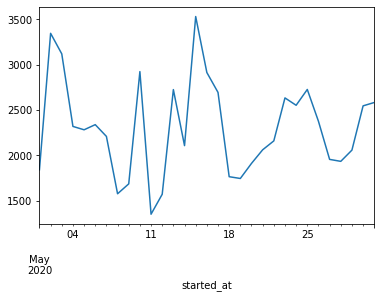

In [83]:
bike_share.resample('D', on='started_at')['duration_secs'].mean().plot()
plt.show()

In [84]:
joyrides = bike_share['start_station_name'] == bike_share['end_station_name']
print(f"Number of Joyrides: {joyrides.sum()}")

Number of Joyrides: 28734


In [85]:
# Median
print(f"Median of all rides: {bike_share['duration'].median()}")
print(f"Median of joyrides: {bike_share[joyrides]['duration'].median()}")

Median of all rides: 0 days 00:19:40
Median of joyrides: 0 days 00:42:50


## Additional datetime methods in Pandas

In [86]:
bike_share['duration_secs'].min()

-1437.0

In [87]:
bike_share['started_at'].head(3).dt.tz_localize('America/New_York')

0   2020-05-31 16:01:38-04:00
1   2020-05-15 20:27:22-04:00
2   2020-05-27 09:30:37-04:00
Name: started_at, dtype: datetime64[ns, America/New_York]

In [88]:
bike_share['started_at'] = bike_share['started_at'].dt.tz_localize('America/New_York')

In [89]:
bike_share['ended_at'] = bike_share['ended_at'].dt.tz_localize('America/New_York')

In [90]:
bike_share['duration'] =  bike_share['ended_at'] - bike_share['started_at']
bike_share['duration'].dt.total_seconds().min()

-1437.0

In [91]:
bike_share[bike_share['duration'] == bike_share.duration.min()]

ride_id rideable_type                started_at  \
115488  51DF854E4B990F61   docked_bike 2020-05-16 16:43:01-04:00   

                        ended_at start_station_name  start_station_id  \
115488 2020-05-16 16:19:04-04:00     15th & W St NW               496   

           end_station_name  end_station_id  start_lat  start_lng  end_lat  \
115488  14th & Irving St NW           461.0    38.9191   -77.0345  38.9286   

        end_lng member_casual  is_equity          duration  duration_secs  
115488 -77.0322        member      False -1 days +23:36:03        -1437.0

In [92]:
mask = bike_share['started_at'] > bike_share['ended_at']

In [93]:
bike_start_wrong_entry = bike_share.loc[mask, 'started_at']
bike_start_wrong_entry.head()

147   2020-05-18 16:45:34-04:00
207   2020-05-05 18:05:50-04:00
420   2020-05-28 07:39:27-04:00
440   2020-05-02 09:23:41-04:00
495   2020-05-21 19:17:41-04:00
Name: started_at, dtype: datetime64[ns, America/New_York]

In [94]:
bike_end_wrong_entry = bike_share.loc[mask, 'ended_at']
bike_end_wrong_entry.head()

147   2020-05-18 16:45:18-04:00
207   2020-05-05 18:05:39-04:00
420   2020-05-28 07:39:04-04:00
440   2020-05-02 09:23:14-04:00
495   2020-05-21 19:17:17-04:00
Name: ended_at, dtype: datetime64[ns, America/New_York]

In [95]:
bike_share.loc[mask, 'started_at'] = bike_end_wrong_entry
bike_share.loc[mask, 'ended_at'] = bike_start_wrong_entry

In [96]:
bike_share['duration'] =  bike_share['ended_at'] - bike_share['started_at']

In [97]:
bike_share['duration_secs'] = bike_share['duration'].dt.total_seconds()

In [98]:
bike_share['duration_secs'].min()

0.0

In [100]:
bike_share['duration_secs'].max()

2310919.0

In [104]:
bike_share['weekday'] = bike_share['started_at'].dt.day_name()
bike_share.groupby('weekday')['duration_secs'].median()

weekday
Friday       1044.0
Monday       1170.0
Saturday     1350.0
Sunday       1295.0
Thursday     1036.0
Tuesday       994.0
Wednesday    1021.0
Name: duration_secs, dtype: float64

In [102]:
bike_share['started_at'].dtype

datetime64[ns, America/New_York]